/tmp/ipython-input-3249700643.py:29: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Dataset Shape: (768, 9)

=== Linear Regression Results ===
Mean Squared Error: 0.168
R² Score: 0.263

Best Logistic Regression Parameters:
{'C': 0.1, 'solver': 'liblinear'}

=== Logistic Regression Performance ===
Accuracy: 70.78 %
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



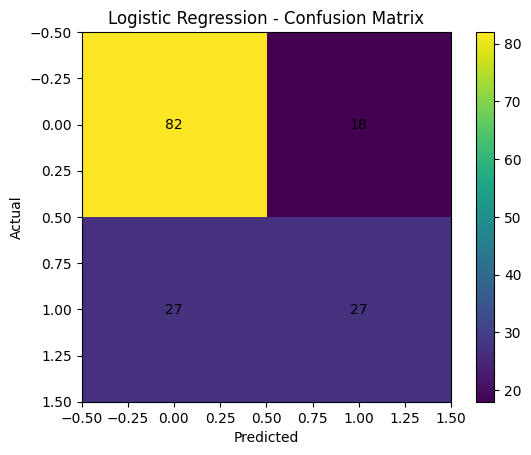

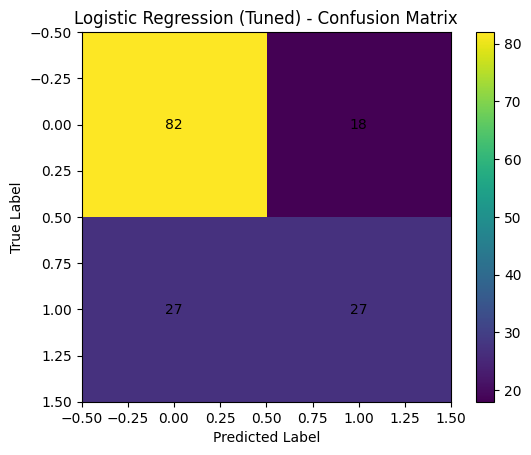

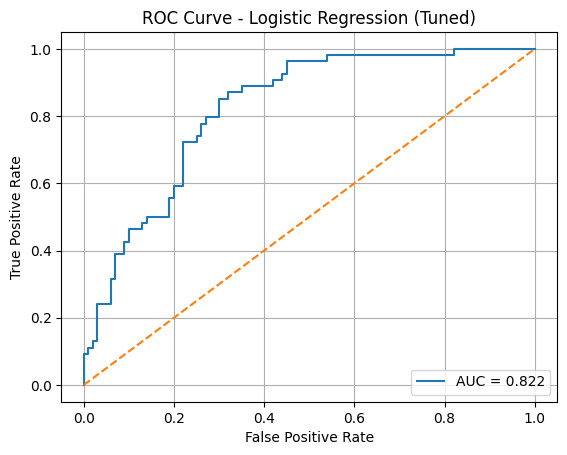

In [ ]:
# ==============================
# Experiment 1: Linear & Logistic Regression
# PIMA Indians Diabetes Dataset
# ==============================

!pip install kagglehub -q

import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
    r2_score
)

# -------------------------
# Load Dataset
# -------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/pima-indians-diabetes-database",
    "diabetes.csv"
)

print("Dataset Shape:", df.shape)
df.head()

# -------------------------
# Data Preprocessing
# -------------------------
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =========================
# Linear Regression
# =========================
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print("\n=== Linear Regression Results ===")
print("Mean Squared Error:", round(mse, 3))
print("R² Score:", round(r2, 3))

# =========================
# Logistic Regression with Hyperparameter Tuning
# =========================
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}

log_reg = LogisticRegression(max_iter=1000)

grid = GridSearchCV(
    log_reg,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_

print("\nBest Logistic Regression Parameters:")
print(grid.best_params_)

# Predictions
y_pred = best_model.predict(X_test_scaled)

# -------------------------
# Evaluation
# -------------------------
print("\n=== Logistic Regression Performance ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print(classification_report(y_test, y_pred))

# -------------------------
# Confusion Matrix Visualization
# -------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


from sklearn.metrics import roc_curve, auc

# -------------------------
# Confusion Matrix (After Hyperparameter Tuning)
# -------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Logistic Regression (Tuned) - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

# -------------------------
# ROC Curve (After Hyperparameter Tuning)
# -------------------------
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = " + str(round(roc_auc, 3)))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Tuned)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

